In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
def read_data():
    data = pd.read_excel('Everest_Android.xlsx', sep=';',  decimal= '.' )
    print('data has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
    return data

In [27]:
data = read_data()

data has 1495 rows and 15 columns


In [17]:
data.head(10)

,Date,Clicks,Organic registrations,Paid registrations,Registrations_from_bloggers,Applications appstore rating,Overall,Featuring,TV REACH,TVR_competitor,TVR,TV OTS,STAND. TVR,TV FREQUENCY,Preinstal
0,2010-01-01,0,4088.0,4844,0,185,429.0,NaN,0.0,0.0,0.0,0,0.0,0.0,449.0
1,2010-01-02,0,2204.0,6668,0,231,NaN,NaN,0.0,0.0,0.0,0,0.0,0.0,72.0
2,2010-01-03,0,2832.0,9768,0,212,511.0,NaN,0.0,0.0,0.0,0,0.0,0.0,26.0
3,2010-01-04,0,3044.0,8968,0,174,425.0,NaN,0.0,0.0,0.0,0,0.0,0.0,20.0
4,2010-01-05,0,2610.0,6870,0,174,424.0,NaN,0.0,0.0,0.0,0,0.0,0.0,12.0
5,2010-01-06,0,2492.0,6558,0,143,337.0,NaN,0.0,0.0,0.0,0,0.0,0.0,18.0
6,2010-01-07,0,2964.0,8578,0,150,359.0,NaN,0.0,0.0,0.0,0,0.0,0.0,9.0
7,2010-01-08,0,2758.0,7378,0,151,359.0,NaN,0.0,0.0,0.0,0,0.0,0.0,10.0
8,2010-01-09,0,2712.0,5964,0,138,316.0,NaN,0.0,0.0,0.0,0,0.0,0.0,12.0
9,2010-01-10,0,2418.0,4908,0,139,312.0,NaN,0.0,0.0,0.0,0,0.0,0.0,3.0


In [66]:
data['Organic registrations'] = data['Organic registrations'].fillna(0)
#tv organic_registration



In [67]:
data['Organic registrations'].describe()

count     1495.000000
mean     51327.625418
std      19979.619730
min          0.000000
25%      49178.000000
50%      58220.000000
75%      63438.000000
max      86716.000000
Name: Organic registrations, dtype: float64

In [22]:
#data['TV REACH'].describe()

In [23]:
#data['TVR'].describe()

In [24]:
#data['TV OTS'].describe()

In [25]:
#data['TV FREQUENCY'].describe()

In [72]:
#set variables
y, x1, x2, x3, x4 = data['Organic registrations'], data['TV REACH'], data['TVR'], data['TV OTS'], data['TV FREQUENCY']

In [47]:
x5 = data['Paid registrations']

In [36]:
def plot(x, y):
    fig, ax = plt.subplots()
    
    fig.set_figwidth(14)
    fig.set_figheight(8)
    
    ax.set_xlabel('TV',
             color='black',
             size = 'x-large')
    ax.tick_params(axis = 'x',
              labelcolor = 'black',
              labelsize = 'large')
    ax.set_ylabel('Organic Registration',
             color='black',
             size = 'x-large')
    ax.tick_params(axis='y',
              labelcolor = 'black',
              labelsize = 'large')
    ax.plot(x, y,  color = 'green')
    return plt.show()

In [45]:
#plot 1

def plot(x1, x2):
    fig, ax = plt.subplots()

    fig.set_figwidth(12)
    fig.set_figheight(6)

    ax.set_xlabel('Date')
    ax.tick_params(axis = 'x',
              bottom = False,
              labelbottom = False)
    ax.set_ylabel('TV',
             color='green',
             size = 'x-large')
    ax.tick_params(axis='y',
              labelcolor = 'green',
              labelsize = 'large')
    ax.plot(x1,  color = 'green')

    ax_precip = ax.twinx()
    ax_precip.set_ylabel ('OR',
                     color = 'blue',
                     size = 'x-large')
    ax_precip.tick_params(axis='y',
              labelcolor = 'blue',
              labelsize = 'large')
    ax_precip.plot(x2,  color='blue' )

    return plt.show()

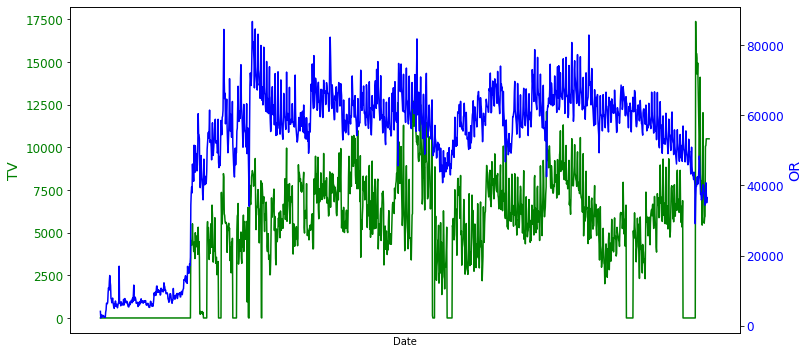

In [46]:
#plot1
plot(x1, y)

In [ ]:
#plot2
plot(x1, y)

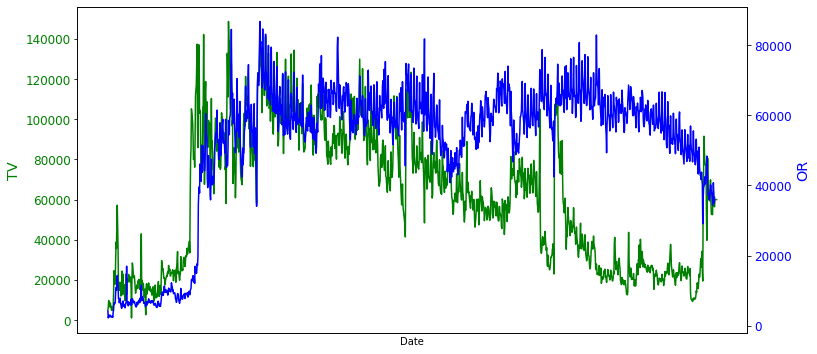

In [48]:
#plot3
plot(x5, y)

In [56]:
x1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TV REACH, dtype: float64

In [68]:
reg = LinearRegression()

X = np.array(x1)
y = np.array(y)

X

array([    0.,     0.,     0., ..., 10500., 10500., 10500.])

In [78]:
mod = sm.OLS(y, x1)
res = mod.fit()

In [79]:
print(res.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Organic registrations   R-squared (uncentered):                   0.844
Model:                               OLS   Adj. R-squared (uncentered):              0.844
Method:                    Least Squares   F-statistic:                              8083.
Date:                   Fri, 24 Apr 2020   Prob (F-statistic):                        0.00
Time:                           13:24:22   Log-Likelihood:                         -17053.
No. Observations:                   1495   AIC:                                  3.411e+04
Df Residuals:                       1494   BIC:                                  3.411e+04
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------